In [65]:
import planetspy as ps
import planetspy.engines as eng
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection

class record:
    loc = []
    def __init__(self, bodies):
        self.loc.append(np.copy(bodies[0][::,0:3]))
    def run(self, simclass):
        self.loc.append(np.copy(simclass.bodies[0][::,0:3]))
        return False

bodies = [
    np.array([[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.371*10**6, 5.972*10**24],
              [0, 6.371*10**6 + 400*10**3, 0, -7667, 0, 0, 1, 1000],
              [6.371*10**6 + 385*10**6, 0, 0, 0, 10**3, 0, 1737.5*10**3, 7.35*10**22]
             ])
    , [["Earth", "r-"], ["ISS", "b-"],["Moon", "m-"]]
]

recinst = record(bodies)
sim = ps.Simulate(eng.PP, 100, 10, bodies, bailout = 60*60*24*30, envmod=[recinst])
sim.main_loop()
sim.steps

259200.0

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 215, in process
    func(*args, **kwargs)
  File "/usr/local/lib/python3.7/site-packages/matplotlib/animation.py", line 1478, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


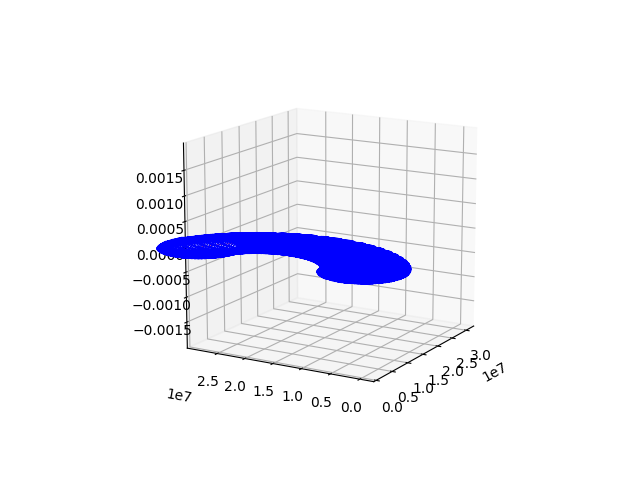

In [66]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for j in range(0,len(bodies)+1):
    ax.plot([i[j][0] for i in recinst.loc], [i[j][1] for i in recinst.loc], [i[j][2] for i in recinst.loc], bodies[1][j][1], linewidth = .5)

ax.set_aspect("equal")
plt.show()

<IPython.core.display.Javascript object>


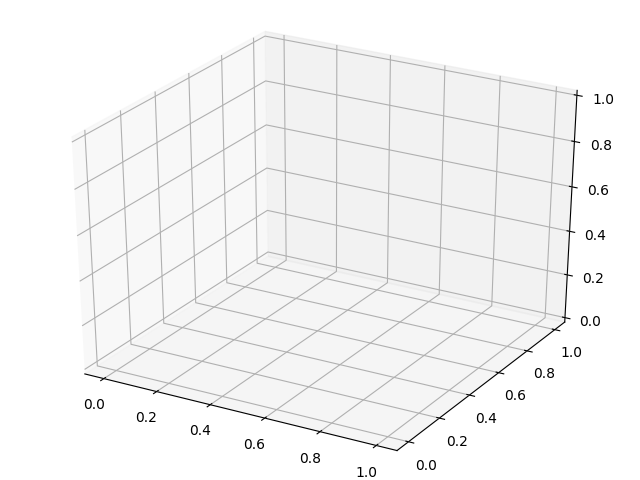

In [67]:
#animation 
import mpl_toolkits.mplot3d.axes3d as p3
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()
ax = p3.Axes3D(fig)
particles = ax.plot([],[],[], 'ko')
def animate(i):
    global recinst, ax, fig
                      #all x positions.    , all y positions.    , all z positions
    particles.set_data(recinst.loc[i][::,0], recinst.loc[i][::,1], recinst.loc[i][::,2])
    return particles
ani = animation.FuncAnimation(fig, animate, frames=600, fargs= (bodies, recinst.loc), interval=10, blit=False, init_func=record.__init__)
plt.show()